<a href="https://colab.research.google.com/github/Krutika-bhandekar/Retail-Sales-Prediction/blob/main/Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**-  **Retail Sales Prediction**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
**Krutika Bhandekar**


# **Project Summary -**

This dataset is a live dataset of Roseman Stores. On analsysing this problem we observe that Roseman problem is a regression problem and our primarily goal is to predict the sales figures of Roseman problem. In this Notebook we work on following topics

Analysing the Dataset by using Exploratory Data Analysis. Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset. Analyse Regression analysis using following prediction analysis, A. Linear Regression Analysis B. Elastic Regression ( Lasso and Ridge Regression). C. Random Forest Regression. d.adaboost and Xgboost).

By applying above algorthim we find accuracy of 98% by Xgboost.

# **GitHub Link -**

https://github.com/Krutika-bhandekar/Coronavirus-Tweet-Sentiment-Analysis

# **Problem Statement**


**Write Problem Statement Here.**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.
Data Description
Rossmann Stores Data.csv - historical data including Sales
store.csv - supplemental information about the stores
Data fields
Most of the fields are self-explanatory.
Id - an Id that represents a (Store, Da,,te) duple within the set
Store - a unique Id for each store
Sales - the turnover for any given day (Dependent Variable)
Customers - the number of customers on a given day

# **Data Description**

**Rossmann Stores Data.csv - historical data including Sales**

**store.csv - supplemental information about the store**

Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year] **- gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Rosmann Data
database = "/content/drive/MyDrive/csv_files/Rossmann Stores Data.csv"
sales_df =pd.read_csv(database)
# Store data
database = "/content/drive/MyDrive/csv_files/store (1).csv"
store_df =pd.read_csv(database)

<ipython-input-3-e04270ae9c89>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df =pd.read_csv(database)


### Dataset First View

In [4]:
# Dataset First Look
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
# change state holiday value a,b,c is equal to 1
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [9]:
# change datatype object into date format
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [10]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# **2-Data Wrangling**

#### Missing Values/Null Values

In [12]:
# CompetitionDistance - distance in meters to the nearest competitor store

sales_df['SchoolHoliday'] .unique()

array([1, 0])

In [13]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [14]:
li = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]
for i in li:
  print(i)
  print(sales_df[i].unique())
  print("-----------------------")


DayOfWeek
[5 4 3 2 1 7 6]
-----------------------
StateHoliday
['0' 'a' 'b' 'c' 0]
-----------------------
SchoolHoliday
[1 0]
-----------------------


In [15]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [16]:
# STORE DATASET FILL INTO NULL VALUES I.E 0
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [17]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [18]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [19]:
final1 = pd.merge(sales_df, store_df, on='Store', how='left')

In [20]:
final1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [21]:
#Change data types object to int
final1.loc[final1['StateHoliday'] == '0', 'StateHoliday'] = 0
final1.loc[final1['StateHoliday'] == 'a', 'StateHoliday'] = 1
final1.loc[final1['StateHoliday'] == 'b', 'StateHoliday'] = 2
final1.loc[final1['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name i.e StateHoliday with function astype
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy=False)

In [22]:
# change Data Types object into int
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

In [23]:
# change Data Types object into int
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

In [24]:
print(final1[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [25]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [26]:
 final1["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [27]:
# code for changing format of date from object to datetime
final1['Date'] = pd.to_datetime(final1['Date'], format= '%Y-%m-%d')

In [28]:
# code for change object into date format
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month

In [29]:
# code for change float into integer
final1['CompetitionOpenSinceYear']= final1['CompetitionOpenSinceYear'].astype(int)
final1['Promo2SinceYear']= final1['Promo2SinceYear'].astype(int)

In [30]:
# code for change float into integer
final1['CompetitionDistance']= final1['CompetitionDistance'].astype(int)
final1['Promo2SinceWeek']= final1['Promo2SinceWeek'].astype(int)

In [31]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

# **3-Understanding Your Variables**

In [32]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [33]:
final1.describe().apply(lambda x: round(x, 2))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Sales

**Line chart**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

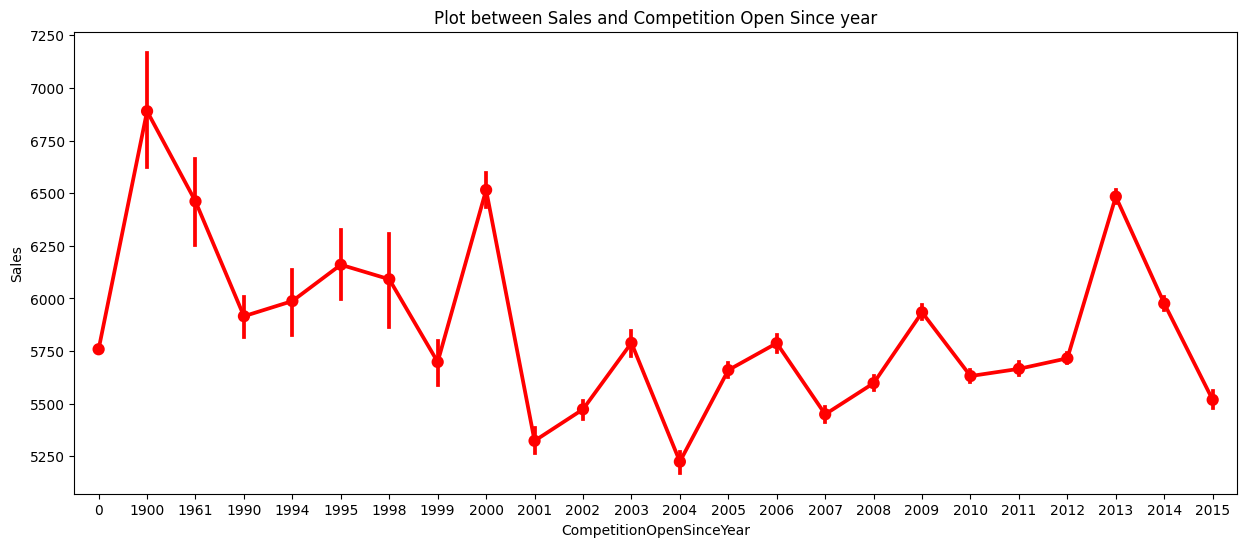

In [34]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

##### **1. Why did you pick the specific chart?**


Point plot is used to represent the relationship between the "CompetitionOpenSinceYear" variable and the "Sales" variable in the "final1" dataset.

#####**2. What is/are the insight(s) found from the chart?**


1. Sales Variation
2. Impact of Competition Opening
3. Seasonality or Trends
4. Confidence Intervals

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Positive business impact:

1. Identifying Sales Patterns
2. Optimal Competition Opening Timing
3. Forecasting and Planning

Negative growth:

1. Increased Competition Impact
2. Saturation or Market Exhaustion
3. Ineffective Response to Competition

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

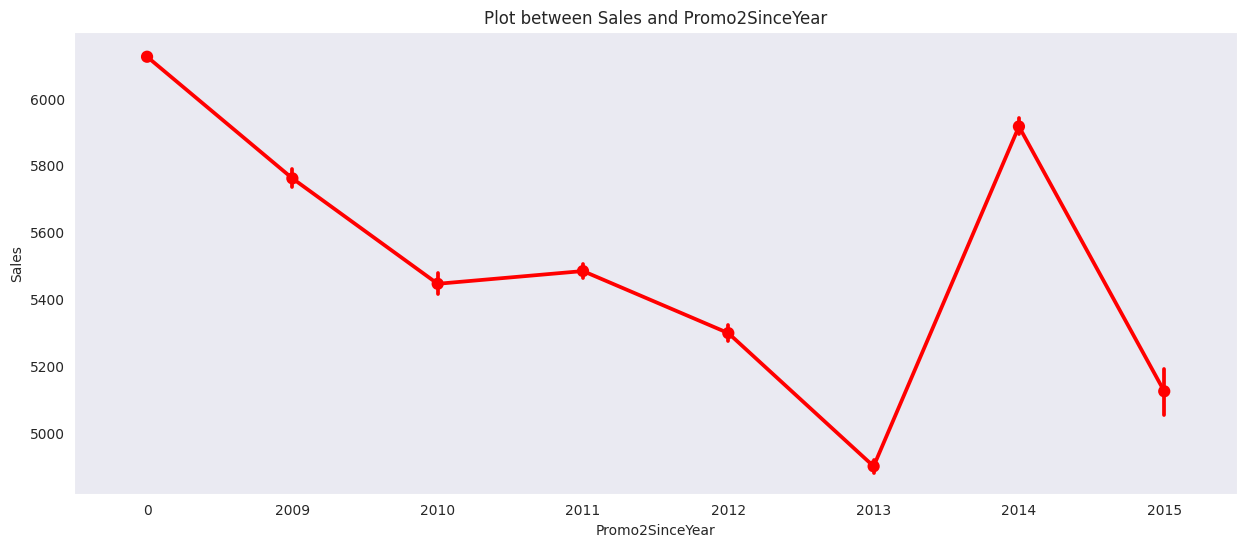

In [35]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Promo2SinceYear')

##### **1. Why did you pick the specific chart?**


The point plot allows you to observe any trends or patterns in sales with respect to the Promo2 start year.

#####**2. What is/are the insight(s) found from the chart?**


1. Impact of Promo2 on Sales
2. Optimal Promotion Timing
3. Seasonal or Periodic Patterns

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Positive business impact:

1. Optimizing Promotional Strategies
2. Strategic Timing of Promotions
3. Seasonal Sales Patterns

Negative growth:

1. Ineffectiveness of Promotions
2. Market Saturation

Text(0.5, 1.0, 'Plot between Sales and DayOfWeek')

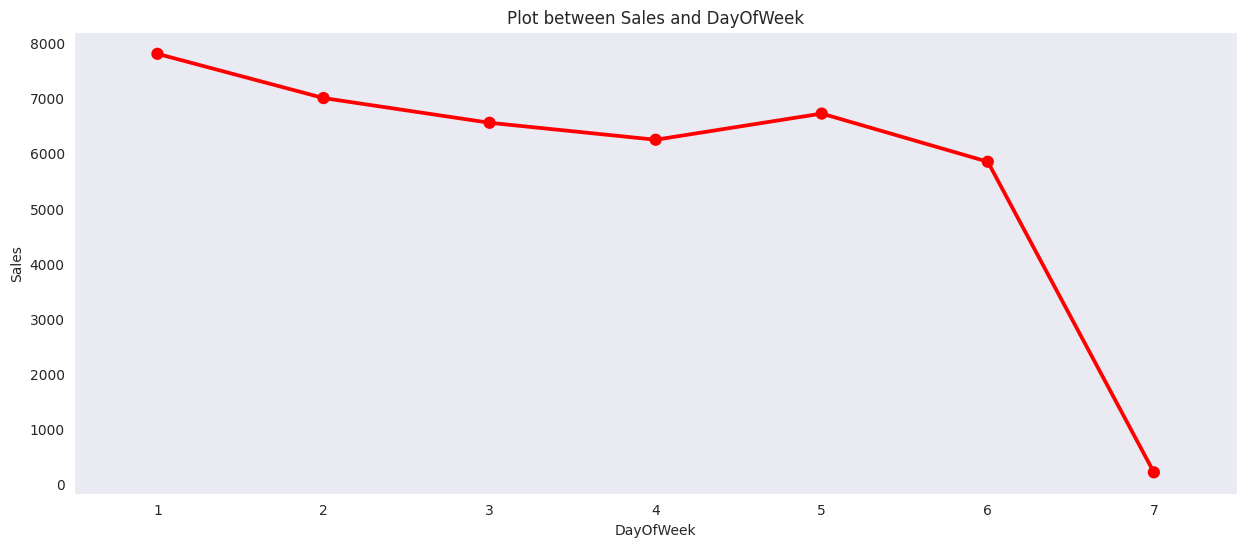

In [36]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and DayOfWeek')

##### **1. Why did you pick the specific chart?**


A point plot is a suitable choice when you want to compare the average sales across different days of the week. By using a point plot, you can visualize the central tendency (average sales) and dispersion (error bars) of sales for each day of the week.

#####**2. What is/are the insight(s) found from the chart?**


1. Sales Variation by Day of the Week
2. Impact of Weekdays on Sales Performance
3. Seasonal or Periodic Patterns

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Positive business impact:

1. Optimal Resource Allocation
2. Targeted Marketing and Promotions
3. Inventory Planning and Supply Chain Optimization

Negative growth:

1. Low Sales on Key Business Days
2. Lack of Sales Variation



Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

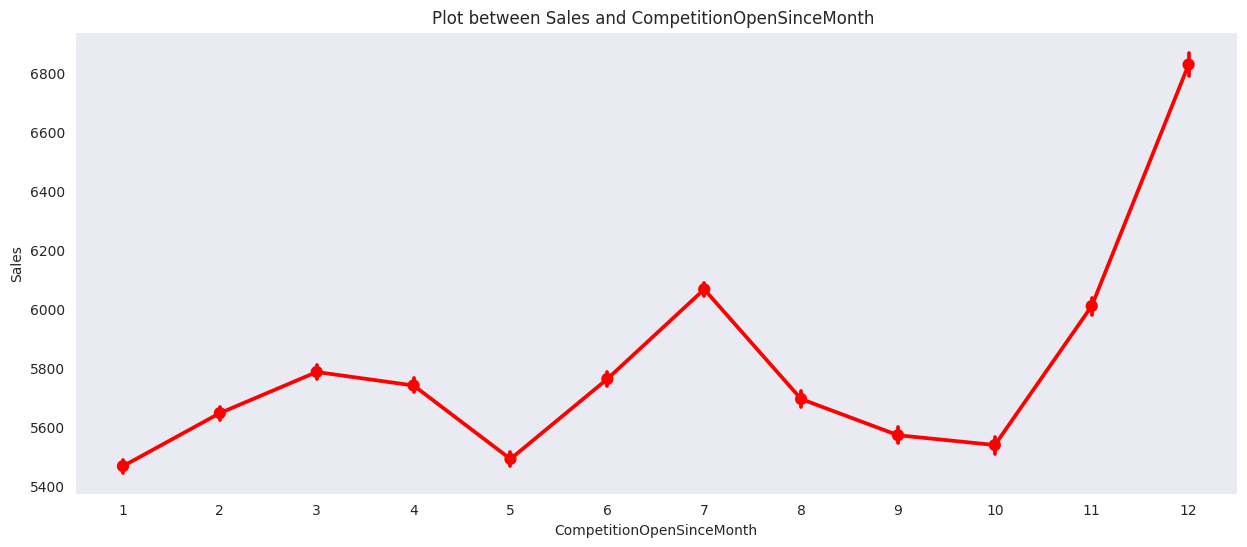

In [37]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

##### **1. Why did you pick the specific chart?**


By using a point plot, you can easily observe the average sales (represented by the height of the points) for each competition open month.

#####**2. What is/are the insight(s) found from the chart?**


1. Sales Variation by Competition Open Month
2. Impact of Competition Opening Month on Sales
3. Seasonal or Monthly Patterns

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Positive business impact:

1. Understanding Sales Variation by Competition Open Month
2. Optimization of Business Strategies
3. Seasonal and Monthly Patterns

Negative growth:

1. Consistently Low Sales in Certain Competition Open Months
2. Declining Sales over Time

**BOX PLOT**

Text(0.5, 1.0, 'Boxplot For Sales Values')

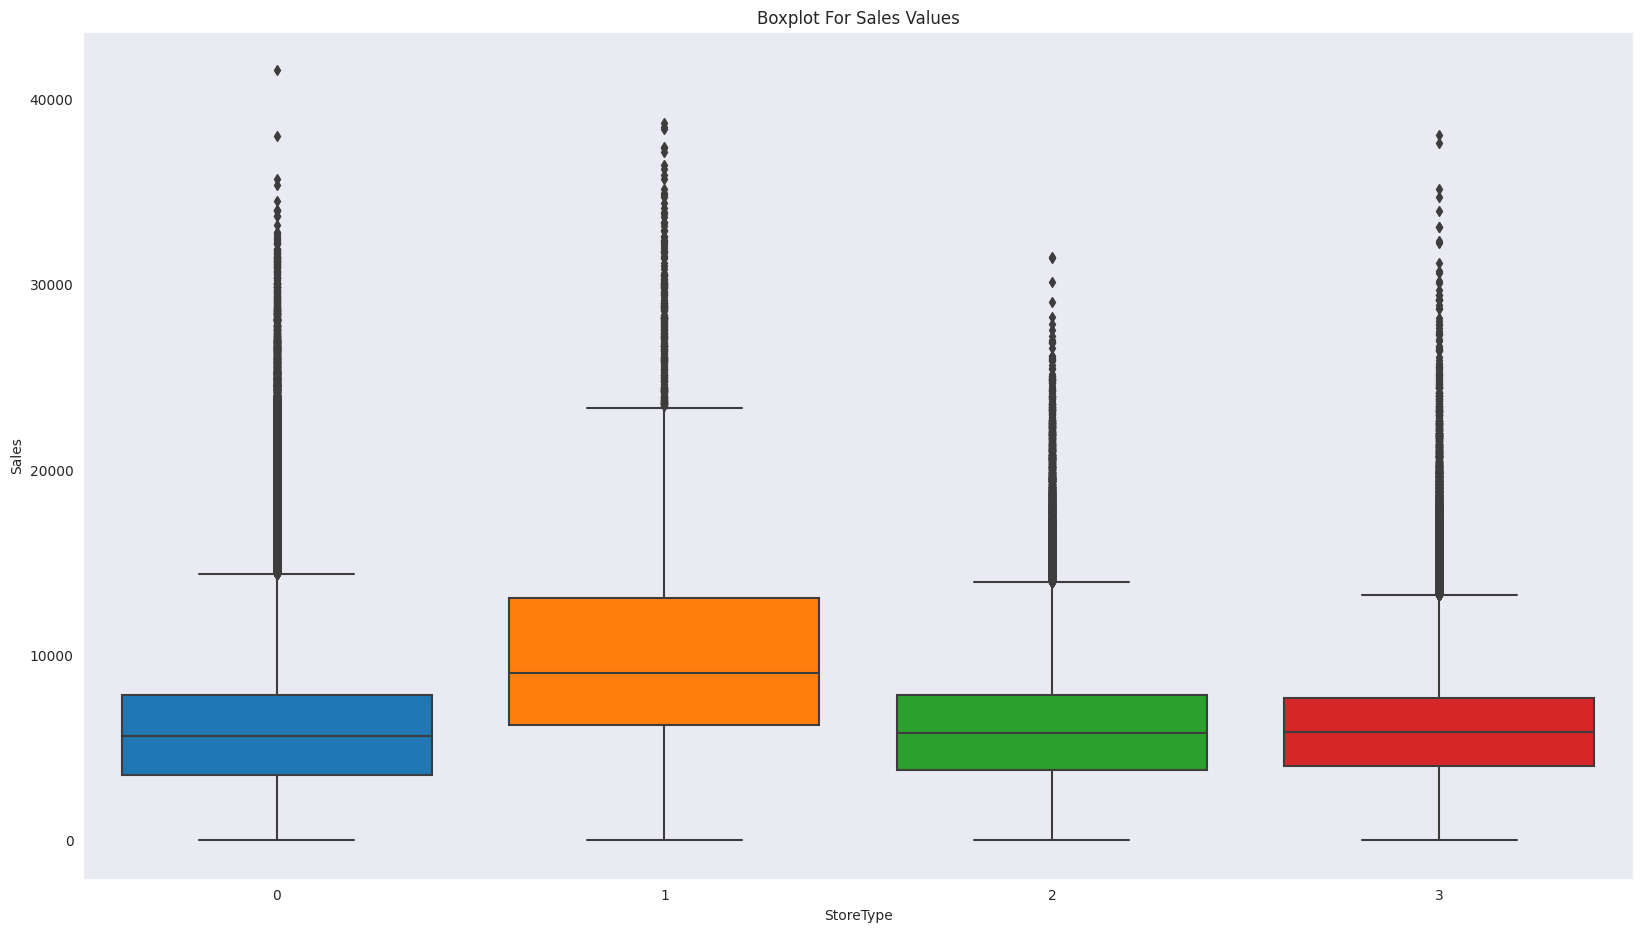

In [38]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final1, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values')

##### **1. Why did you pick the specific chart?**


The box plot allows you to compare the distribution of sales values for different store types.

#####**2. What is/are the insight(s) found from the chart?**


1. Sales Range by Store Type
2. Median Sales by Store Type
3. Sales Variability by Store Type
4. Outliers

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Positive business impact:

1. Identifying High-Performing Store Types
2. Understanding Sales Variability
3. Detecting Outliers and Potential Areas of Improvement

Negative growth:

1. Consistently Low Sales for Specific Store
2. High Sales Variability for Certain Store Types

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment')

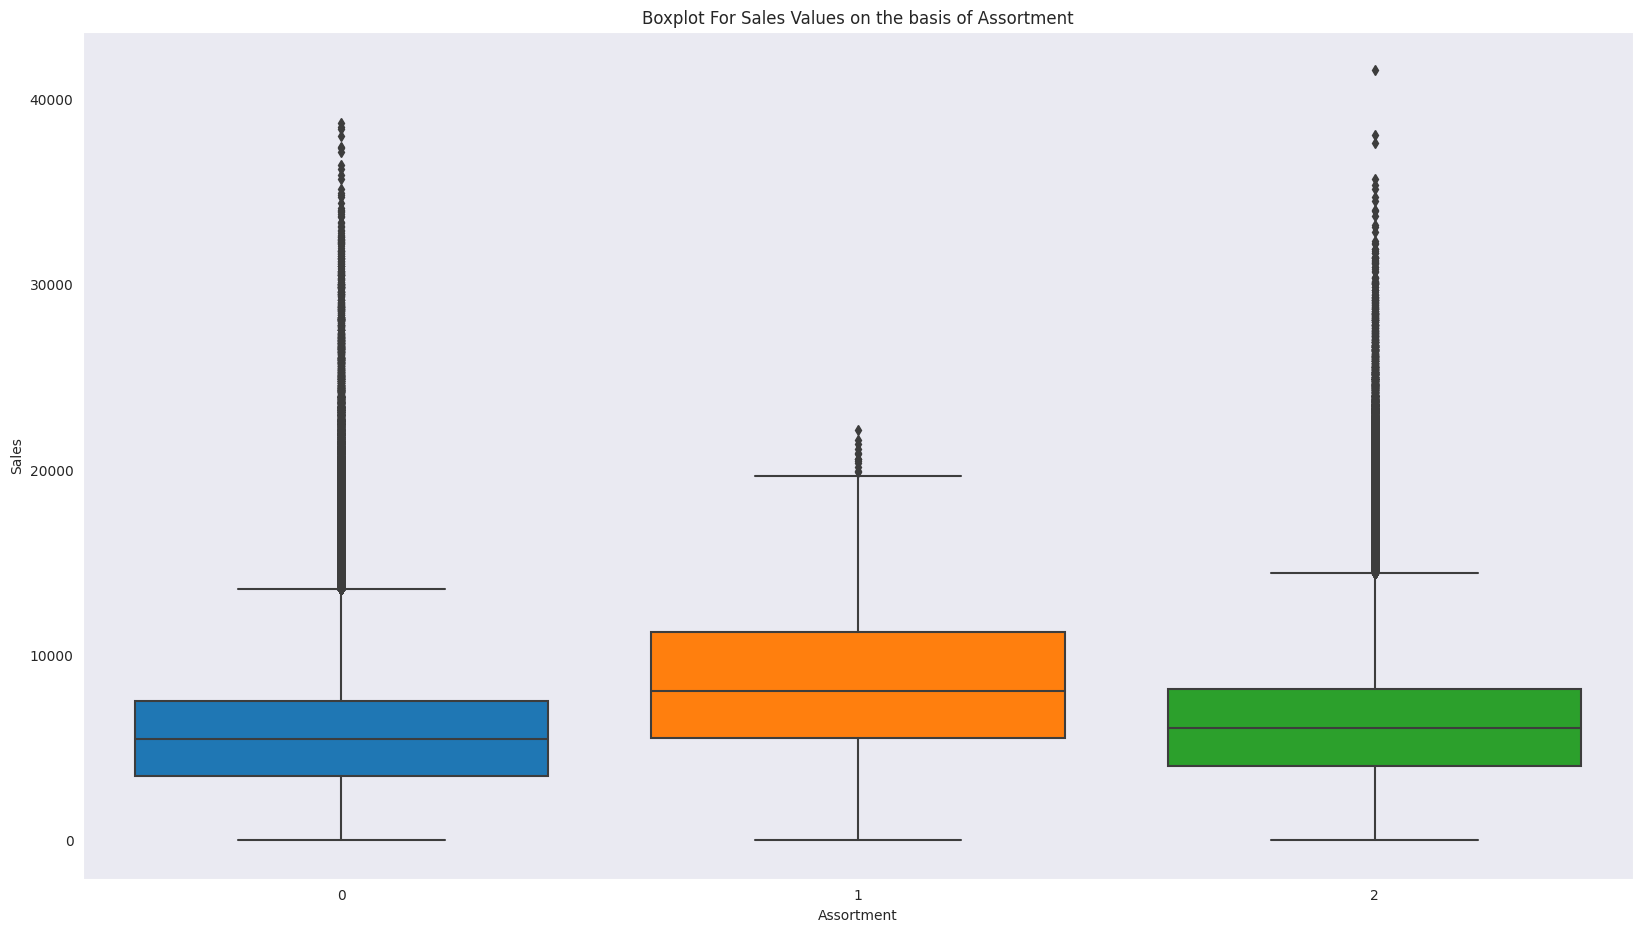

In [39]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final1, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values on the basis of Assortment')

##### **1. Why did you pick the specific chart?**


 The box plot allows you to compare the distribution of sales values for different assortments.

#####**2. What is/are the insight(s) found from the chart?**



1. Sales Range by Assortment
2. Median Sales by Assortment
3. Sales Variability by Assortment
4. Identification of Outliers

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

 Positive business impact:

 1. Optimization of Assortment Strategies
 2. Understanding Sales Variability

 Negative growth:

 1. Consistently Low Sales for Specific Assortment Categories
 2. High Sales Variability for Certain Assortment Categories

Text(0.5, 1.0, 'Store Daily Open Countplot')

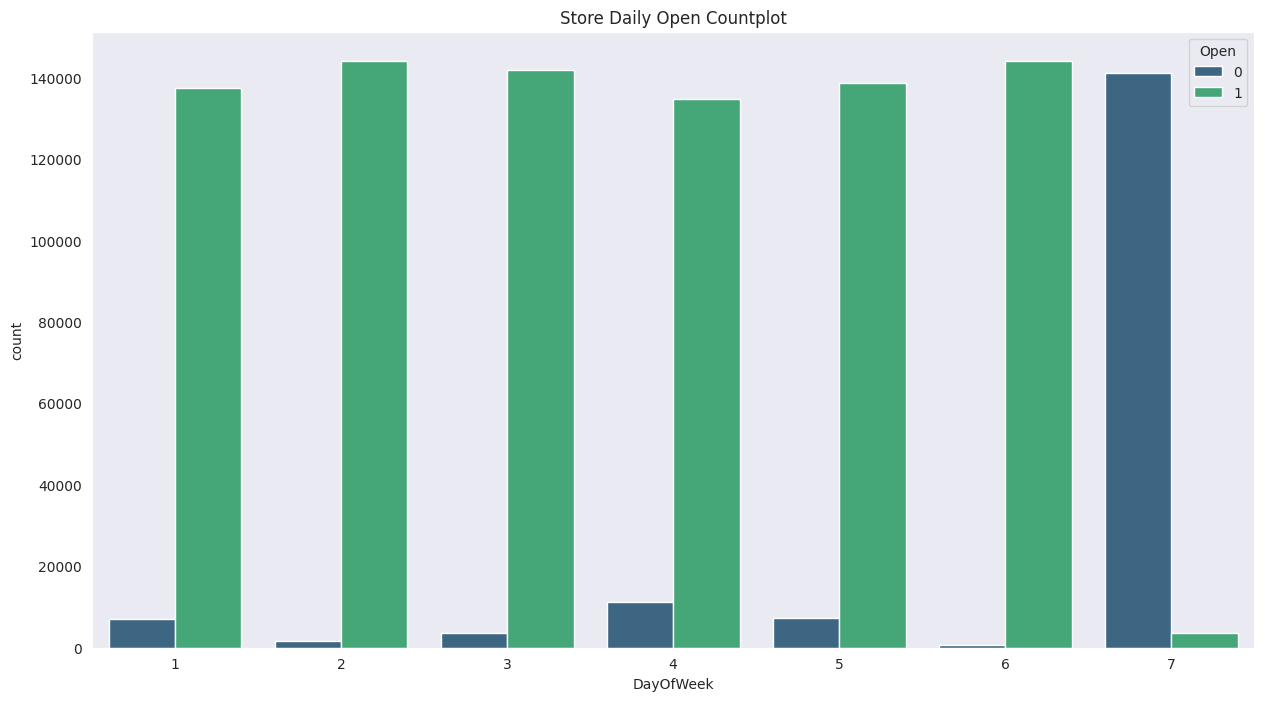

In [40]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Open', data= final1, palette='viridis')
plt.title('Store Daily Open Countplot')

##### **1. Why did you pick the specific chart?**


The count plot allows you to compare the frequency of open and closed days for each day of the week.

#####**2. What is/are the insight(s) found from the chart?**


1. Distribution of Open and Closed Days
2. Patterns in Store Opening
3. Store Availability
4. Assessment of Operational Efficiency

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Positive business impact:

1. Operational Optimization
2. Customer Expectations and Satisfaction
3. Marketing and Promotions

Negative growth:

1. Imbalanced Store Availability
2. Inconsistent Operational Practices

Text(0.5, 1.0, 'Store Daily Promo Countplot')

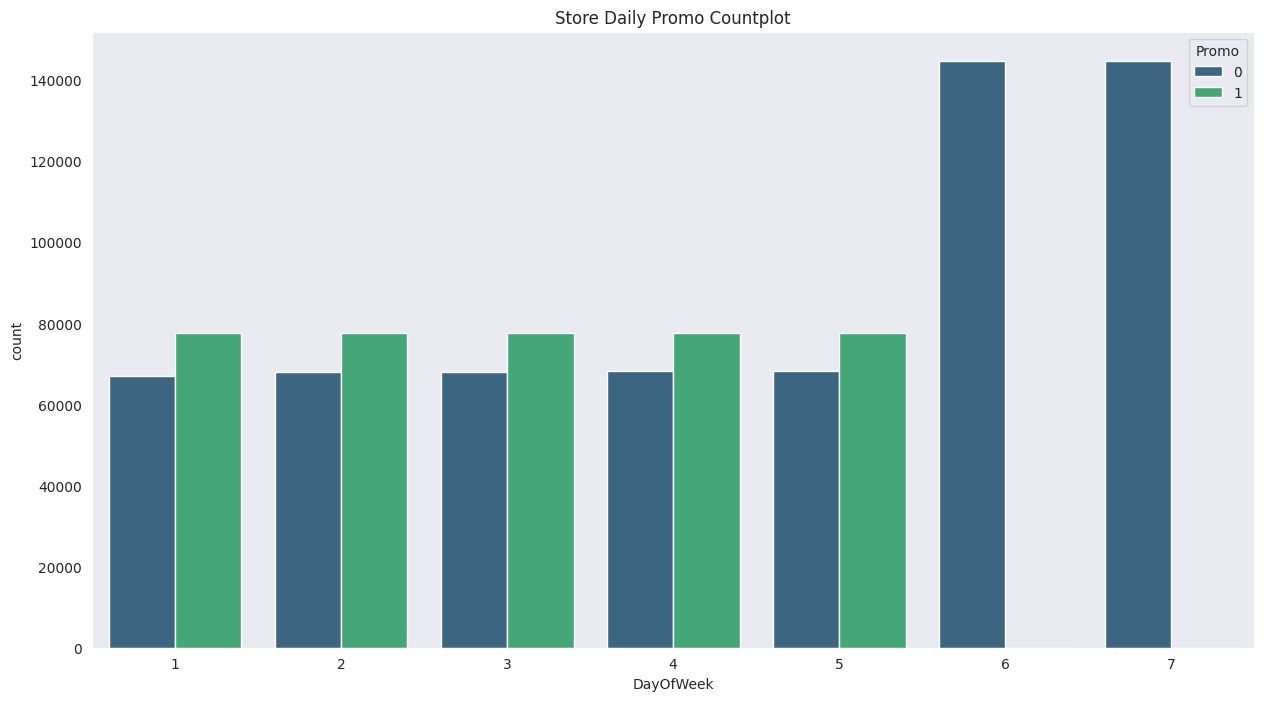

In [41]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final1, palette='viridis')
plt.title('Store Daily Promo Countplot')

##### **1. Why did you pick the specific chart?**


The count plot allows you to compare the frequency of promotions for each day of the week. By using different colors (hue) to represent the "Promo" variable, you can easily distinguish between the presence and absence of promotions on different days. This visualization helps you understand the distribution of promotions across the days of the week.

#####**2. What is/are the insight(s) found from the chart?**


1. Distribution of Promotions
2. Patterns in Promotion Days
3. Assessment of Promotion Strategies
4. Customer Response to Promotions

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Positive business impact:

1. Optimization of Promotion Strategies
2. Customer Behavior and Preferences

Negative growth:

1. Ineffective Promotion Days
2. Imbalanced Promotion Distribution

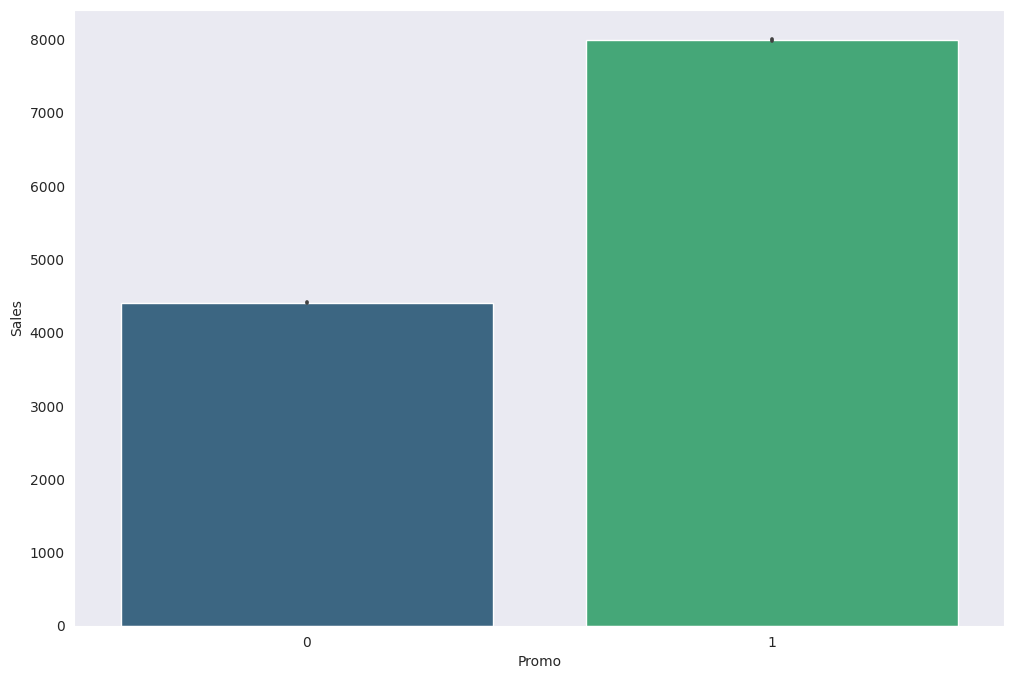

In [42]:
plt.figure(figsize=(12, 8))
promo_sales = sns.barplot(x="Promo", y="Sales", data=final1, palette='viridis')

##### **1. Why did you pick the specific chart?**


The bar plot allows you to compare the mean sales values for two categories of the "Promo" variable. By using different colors (palette) to represent the "Promo" variable, you can easily distinguish between the sales values with and without promotion. This visualization enables a clear comparison of the average sales between the two groups.

#####**2. What is/are the insight(s) found from the chart?**


1. Comparison of Sales with and without Promotion
2. Effectiveness of Promotions
3. Quantitative Assessment of Sales Performance
4. Identification of Sales Patterns

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Positive business impact:

1. Evaluation of Promotion Effectiveness
2. Decision-Making for Promotional Strategies


Negative growth:

1. Ineffective Promotions
2. Misalignment of Promotions with Customer Demand

## **State Holiday**

**0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None**

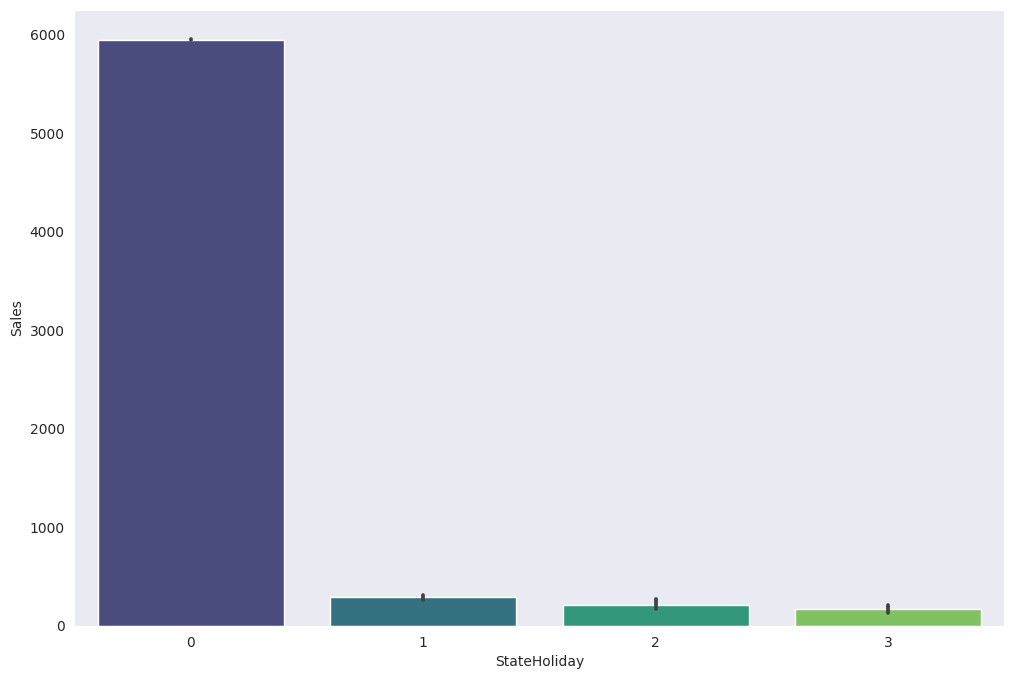

In [43]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final1,palette='viridis')

##### **1. Why did you pick the specific chart?**


The bar plot allows you to compare the mean sales values for different levels of the "StateHoliday" variable. By using different colors (palette) to represent the "StateHoliday" variable, you can easily distinguish between the different types of state holidays. This visualization enables a clear comparison of the average sales across different state holidays.

#####**2. What is/are the insight(s) found from the chart?**


1. Comparison of Sales by State Holiday
2. Influence of State Holidays on Sales
3. Understanding Consumer Behavior
4. Identification of Sales Opportunities


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Positive business impact:

1. Understanding Sales Patterns
2. Tailoring Marketing Strategies
3. Customer Behavior Analysis

Negative growth:

1. Ineffective State Holiday Promotions
2. Negative Customer Response

## **School Holiday**

**0='Not Holiday', 1='Holiday'**

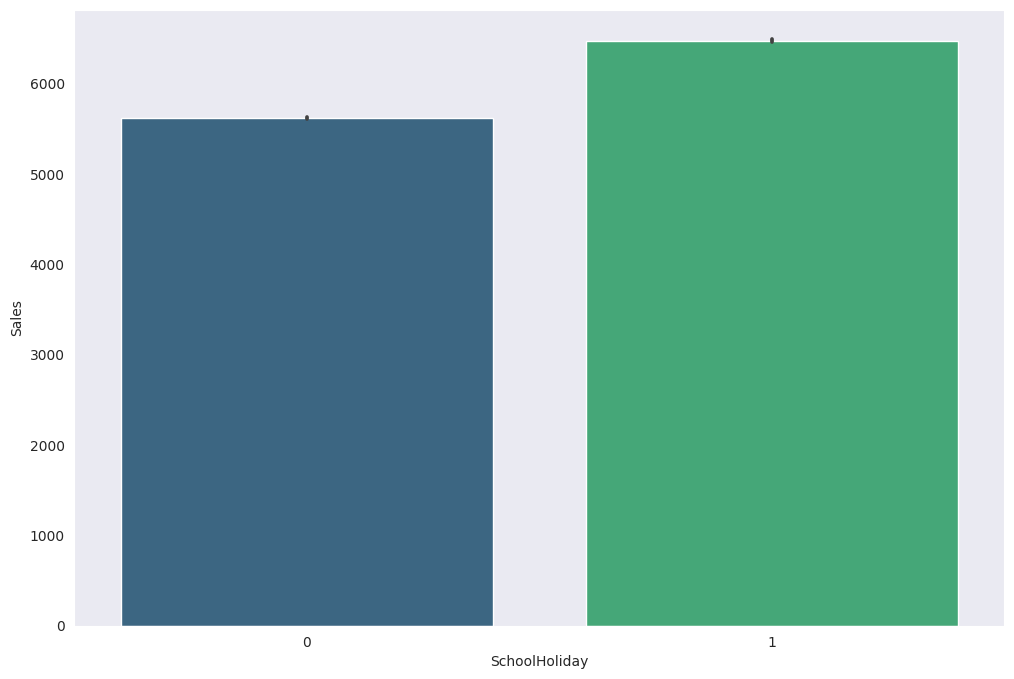

In [44]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final1,palette='viridis')

##### **1. Why did you pick the specific chart?**


Bar plots visualize and compare the sales performance between the two categories (school holiday and non-school holiday). The choice of a bar plot allows you to see the relative differences in sales for each category and make comparisons between them.

#####**2. What is/are the insight(s) found from the chart?**


1. Sales during School Holidays vs. Non-School Holidays
2. Impact of School Holidays on Sales
3. Relative Sales Performance

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Positive business impact:

1. Optimizing Marketing and Promotions
2. Inventory Planning and Stock Management
3. Staffing and Operational Planning

Negative impact on business growth:

1. Lower Sales during School Holidays

# **Conclusion of EDA**



1)From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.

2)From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.

3)Plot between Promotion and Sales shows that promotion helps in increasing Sales.

4)Type of Store plays an important role in opening pattern of stores.

5)All Type ‘b’ stores never closed except for refurbishment or other reason.

6)All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.

7)ssortment Level ‘b’ is only offered at Store Type ‘b’.


8)We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.

# **6-Feature Engineering & Data Pre-processing**

**Feature engineering and data preprocessing are crucial steps in the machine learning pipeline that involve transforming raw data into a format that is suitable for training a machine learning model. These steps aim to extract relevant information from the data, improve the representation of features, handle missing values, and normalize the data.**

<ipython-input-45-d5bf9bfc42bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final1.corr()


<Axes: >

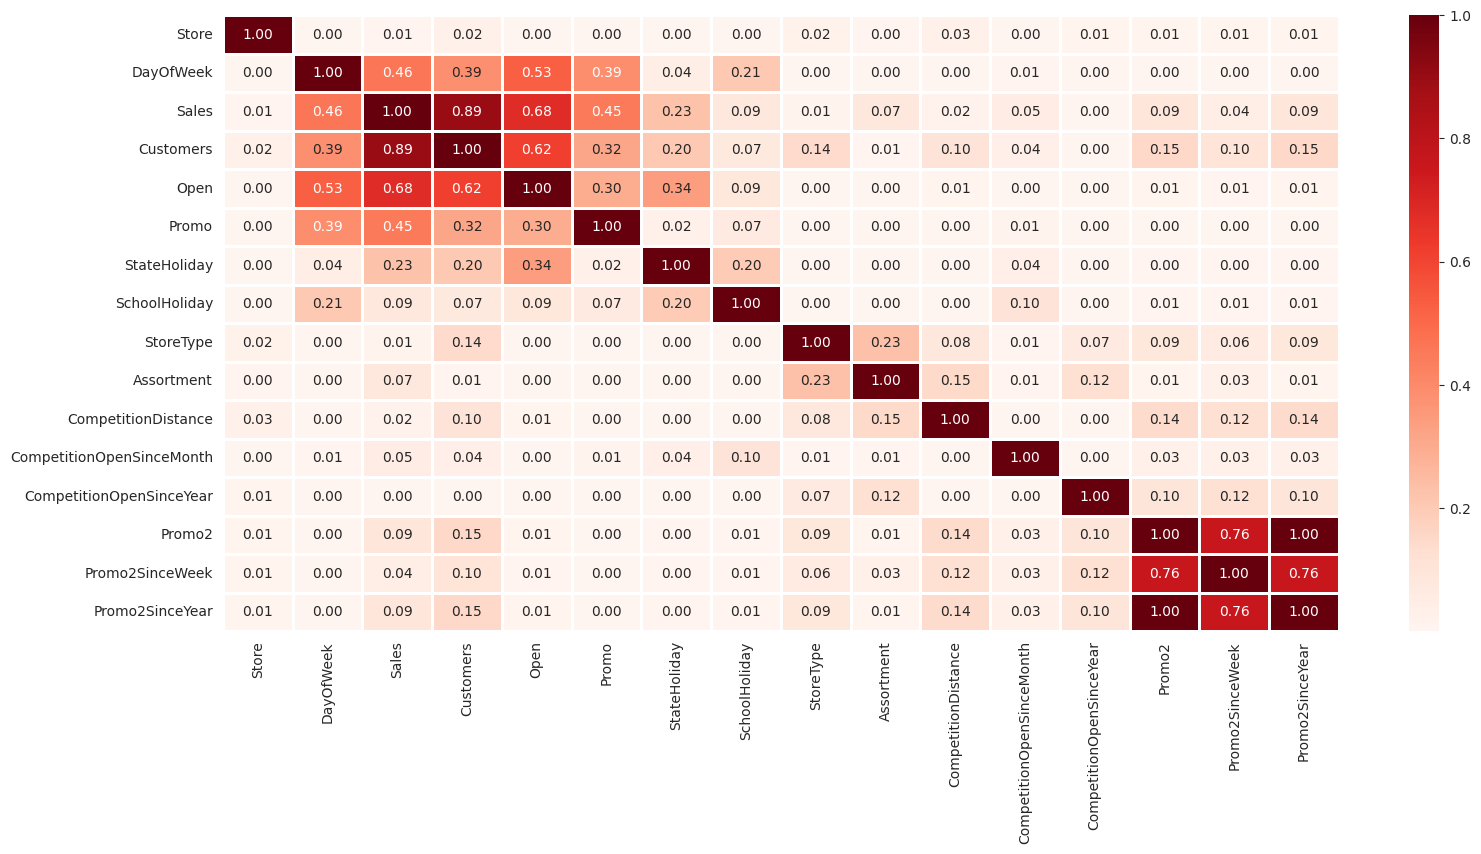

In [45]:
plt.figure(figsize=(18,8))
correlation = final1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")

# **Multicollinearity**

**Multicollinearity refers to a situation in which two or more predictor variables in a regression model are highly correlated with each other. It can cause problems in the interpretation and performance of the regression model. When multicollinearity occurs, it becomes difficult to isolate the individual effects of the correlated variables on the dependent variable.**

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [51]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698820e+00
1,DayOfWeek,4.104634e+00
2,Customers,5.236586e+00
3,Open,9.374439e+00
4,Promo,1.917193e+00
5,StateHoliday,1.187974e+00
6,SchoolHoliday,1.330848e+00
7,StoreType,1.940267e+00
8,Assortment,2.045386e+00
9,CompetitionDistance,1.589466e+00


**In above table we can see that VIF(Variance Inflation Factor) value for column Promo2 and Promo2SinceYear is Higher .So we will drop either Promo2 or Promo2SinceYear and again check VIF value.Here we drop Promo2 column.**

In [52]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,3.696388
1,DayOfWeek,4.104282
2,Customers,5.236066
3,Open,9.373305
4,Promo,1.917150
5,StateHoliday,1.187974
6,SchoolHoliday,1.330831
7,StoreType,1.934410
8,Assortment,2.039789
9,CompetitionDistance,1.583028


### **VIF factor below 10 is look good for Machine Learning Model.**

# **Analysis of Target Variable i.e 'Sales'.**

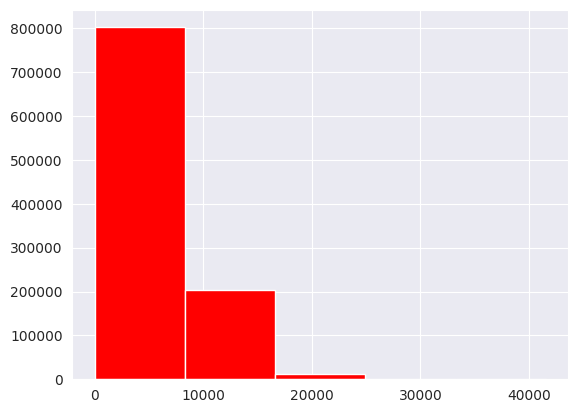

In [53]:
pd.Series(final1['Sales'],).hist(bins=5, color="red")
plt.show()

In [54]:
final1[(final1.Open == 0) & (final1.Sales == 0)].count()[0]

172817


**So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.**

In [55]:
new_df = final1.drop(final1[(final1.Open == 0) & (final1.Sales == 0)].index)

In [56]:
new_df.shape

(844392, 18)

In [57]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,0


**In new_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).**

In [58]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])


In [59]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,150,1,2006,0,0,0,1,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,860,1,1999,0,0,0,1,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,840,1,0,1,48,2012,0,0,1,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,1430,1,0,0,0,0,1,0,0,0


In [60]:
new_df.to_csv('cleandata.csv', index=False)

# **5-Hypothesis Testing**


**Hypothesis testing is a statistical method used to make inferences about a population based on a sample of data. While hypothesis testing is more commonly associated with traditional statistical analysis, it can also be applied in the context of machine learning.**

**Hypothetical Statement - 1**

# **MODEL 1 (excluding rows which has sales =0)**

## **Hypothetical Statement - 2**

# **MODEL 2 (By taking whole Dataset)**

# **6-ML Model Implementation**


# **MODEL TRAINING**

In [61]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

# **MODEL 1 (excluding rows which has sales =0)**


As we have two dataset,first one having sales = '0' rows and another exculding it. We will both the data and find the best model.

**First We will take dataset excluding Sales = '0' rows.**

In [62]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [63]:
#List of Independent Variable
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [64]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [65]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


In [66]:
# Here we Train the model
reg = LinearRegression().fit(X_train, y_train)

In [67]:
#Checking the Regression Score i.e R-squared value
reg.score(X_train, y_train)

0.7635183725690666

In [68]:
# Checking the cofficient of different independent columns
reg.coef_

array([-1.61160602e-01, -6.85548194e+01,  6.35504984e+00, -6.79767354e-12,
        1.29645838e+03, -1.28102415e+03,  3.62329515e+01,  2.76744096e+02,
        2.22217335e+02,  2.88849353e-02,  2.99491278e+01,  8.39884213e-02,
       -4.31860944e+01,  1.24902145e+01,  4.31860944e+01,  3.16962854e+01,
        1.38838509e+02, -2.13720889e+02])

In [69]:
# Checking the intercept of different indpendent columns
reg.intercept_

700.1749140828606

In [70]:
#Predicting Dependent Variable With Test Dataset i.e 20%
y_pred = reg.predict(X_test)
y_pred

array([5324.59975349, 4849.47506442, 7238.44230268, ..., 4098.19887156,
       7772.83233987, 5368.22125565])

In [71]:
# Original Test Dependent Value
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [72]:
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train

array([5490.61068489, 6804.3787408 , 6699.04311466, ..., 7913.72781806,
       6884.64407492, 6123.05554455])

In [73]:
# Dependent Variable With Train Dataset i.e 80 %
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

In [74]:
#Calculate MSE & RMSE for Test Prediction
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2265528.631712661
RMSE : 1505.1673102059656


In [75]:
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7634783399226589


In [76]:
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])

,actual,pred
0,5495,5324.599753
1,5472,4849.475064
2,7969,7238.442303
3,7384,6085.227240
4,13212,7829.105207
...,...,...
168874,16337,16398.115914
168875,9195,7062.744213
168876,2938,4098.198872
168877,10413,7772.832340


In [77]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 27.0 MB/s eta 0:00:00


In [78]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=d63176a542f230b1c6f47143fe6b4e6fc99af35983db31a9d097fc1d47a2d43b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **SHAP and LIME**

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


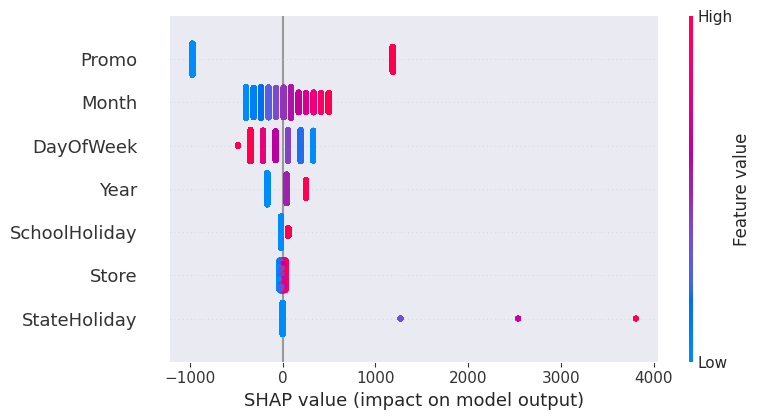

[('2013.00 < Year <= 2014.00', 262307.27339213813), ('StateHoliday <= 0.00', 115412.39735990847), ('6.00 < Month <= 8.00', 6470.131878056359), ('Store <= 281.00', -4604.395160871773)]


X does not have valid feature names, but LinearRegression was fitted with feature names


In [79]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

# load the Rossman dataset
data = pd.read_csv("/content/cleandata.csv", low_memory=False)

# convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# extract year, month, and day of week from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# select relevant features
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month']



# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Sales'], test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

# calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], mode='regression')

# explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=4)

# print the LIME explanation
print(exp.as_list())

# **LASSO**

In [80]:
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001,)

In [81]:
L1.fit(X_train, y_train)

Lasso(alpha=0.4, max_iter=10000)

In [82]:
y_pred_lasso = L1.predict(X_test)

In [83]:
L1.score(X_test, y_test)

0.14929180103281825

In [84]:
cv_scores = cross_val_score(L1, X, y, cv=10)
mean_cv_score = cv_scores.mean()

In [85]:
cv_scores

array([0.73075467, 0.74886334, 0.760761  , 0.75799899, 0.75829695,
       0.76481454, 0.76725115, 0.75273622, 0.7581241 , 0.78478933])

In [86]:
mean_cv_score

0.7584390301539468

In [87]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
lasso_cv = GridSearchCV(L1, parameters, cv=5)
lasso_cv.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.4, max_iter=10000),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [88]:
# extract the best alpha value and corresponding score
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso= lasso_cv.best_score_

In [89]:
best_alpha_lasso

0.2

In [90]:
best_score_lasso

0.7605720937492583

In [91]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,5203,5829.289727
1,8590,7794.671860
2,6465,6414.968598
3,7250,6251.958715
4,4339,6015.521967
...,...,...
168874,10096,8312.337646
168875,12400,7972.321137
168876,7499,5301.836078
168877,11606,7865.971445


**Ridge**

In [92]:
L2 = Ridge(alpha = 0.5)

In [93]:
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [94]:
L2.predict(X_test)

array([5828.34673874, 7794.37526191, 6414.09982314, ..., 5300.58425416,
       7866.48628639, 5957.11172635])

In [95]:
L2.score(X_test, y_test)


0.14931114547968916

In [96]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(X, y)

# extract the best alpha value and corresponding score
best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

# perform cross-validation with the best alpha value
ridge_best = Ridge(alpha=best_alpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, X, y, cv=5)

# find the maximum score and corresponding alpha value
max_score = cv_scores.max()
max_alpha = best_alpha

print("Best alpha value: ", best_alpha)
print("Best score: ", best_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)

Best alpha value:  0.5
Best score:  0.7605702635648154
Maximum CV score:  0.7700304608182428
Corresponding alpha value:  0.5


# **Elastic Net**

In [97]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define the Elastic Net model
elastic_net = ElasticNet(max_iter=10000)

# define the range of alpha and l1_ratio values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# perform grid search to find the best alpha and l1_ratio values
elastic_net_cv = GridSearchCV(elastic_net, parameters, cv=5)
elastic_net_cv.fit(X_train, y_train)

# extract the best alpha and l1_ratio values and corresponding score
best_alpha = elastic_net_cv.best_params_['alpha']
best_l1_ratio = elastic_net_cv.best_params_['l1_ratio']
best_score = elastic_net_cv.best_score_

# create an Elastic Net model with the best hyperparameters
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net_best.fit(X_train, y_train)

# evaluate the model on the testing set
test_score = elastic_net_best.score(X_test, y_test)

print("Best alpha value: ", best_alpha)
print("Best l1_ratio value: ", best_l1_ratio)
print("Best score: ", best_score)
print("Test score: ", test_score)


Best alpha value:  0.1
Best l1_ratio value:  0.9
Best score:  0.7631623015682307
Test score:  0.7631533468498847


# **Decision Tree**

In [98]:
sales_mean=final1[dependent_variables].mean()

In [99]:
sales_mean

5773.818972305593

In [100]:
sales_mean_new=new_df[dependent_variables].mean()

In [101]:
sales_mean_new

6955.514290755952

In [102]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean_new
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 2006697.3608355538
RMSE : 1416.5794580028166
RMPSE : 0.2036627916767399
R2 : 0.7905003784044686


# **MODEL 2 (By taking whole Dataset)**


**In final1 dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).**

In [103]:
final1 = pd.get_dummies(final1, columns=['PromoInterval'])

In [104]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


**We define dependent and independent variables and convert them into arrays**

In [105]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final1.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [106]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [107]:
# Create the data of independent variables
U = final1[indep_var].values
# Create the dependent variable data
V = final1[dep_var].values

In [108]:
V

array([5263, 6064, 8314, ...,    0,    0,    0])

In [109]:
U

array([[  5, 555,   1, ...,   0,   0,   0],
       [  5, 625,   1, ...,   0,   1,   0],
       [  5, 821,   1, ...,   0,   1,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   1]])

In [110]:
final1[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


In [111]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


# **LINEAR REGRESSION**

In [112]:
# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [113]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [114]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7101.66614705, 12611.33802205,  9204.59583455, ...,
        6938.9200533 ,  5999.9747408 ,  4007.9825533 ])

In [115]:
linear_regression.score(U_train, v_train)

0.8677978490444807

In [116]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,7285,7101.666147
1,6221,12611.338022
2,8132,9204.595835
3,20916,11526.502085
4,5472,6593.181772
...,...,...
203437,5650,6655.935678
203438,5464,6520.869272
203439,6191,6938.920053
203440,5663,5999.974741


In [117]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1944268.5102740775
RMSE : 1394.370291663616
RMPSE : 0.24149878933714092
R2 : 0.8684236859866605


# **DECISION TREE**

In [118]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1938797.0529188653
RMSE : 1392.4069279197317
RMPSE : 0.24115874338951052
R2 : 0.8687939610732938


In [119]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,7285,6405.437098
1,6221,10731.775506
2,8132,9096.411096
3,20916,11835.110635
4,5472,5476.684725
...,...,...
203437,5650,5476.684725
203438,5464,5476.684725
203439,6191,8169.463222
203440,5663,6405.437098


In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)

MSE: 1121095.1553439063
RMSE: 1058.8178102695035
RMPSE: 0.18323008502809102
R2: 0.9241310717018353


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(U_train, v_train)
v_pred_ada = adaboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_ada)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_ada)
print("R2 :", r2)

MSE : 2296748.9439930245
RMSE : 1515.5028683552614
RMPSE : 0.26226015159149085
R2 : 0.8445699456285325


In [ ]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, v_train)
v_pred_xgb = xgboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_xgb)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_xgb)
print("R2 :", r2)

MSE : 177545.44218920538
RMSE : 421.3614151642333
RMPSE : 0.07291725467712691
R2 : 0.9879848000779321


# **Conclusion**

We saw that Sales column contains 172817 rows with 0 sale. So we created a   new dataframe in which we removed 0 sales rows and tried to train our model. We used various algorithms and got accuracy score around **74%.**



We were also curious about the total dataset(including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about **98%** which is far better than previous model.




So we came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has **172817**   rows which is quite large and therefore we decided not to remove those values.We got our best rmpse score from **Random Forest model,Graident boosting technique like  adaboost ,Xgboost**,we tried taking an optimum parameter so that our model doesnt overfit.